# Funnel Conversion Analysis
## Definisi Funnel Conversion
Conversion Funnel adalah strategi yang digunakan dalam pemasaran untuk memahami berbagai tahap pengalaman pelanggan potensial saat mereka berinteraksi dengan merek atau produk sebelum memutuskan untuk melakukan pembelian.

Sebuah perusahaan dapat mengumpulkan data dari umpan balik pelanggan dan tes perilaku untuk menentukan strategi terbaik untuk menyampaikan pesan yang tepat kepada pelanggan pada waktu yang tepat.

Bayangkan sebuah tabung berbentuk corong—dengan bukaan lebar di bagian atas yang berangsur-angsur menjadi sangat sempit ke arah bawah. Bagian atas adalah tempat pelanggan memulai perjalanan mereka untuk berpotensi membeli produk Anda dan bagian bawah adalah tempat mereka menyelesaikan pembelian.

Jumlah pelanggan yang dihasilkan akan berkurang saat mereka berpindah dari satu tahap ke tahap berikutnya di corong konversi hingga mencapai bagian bawah, tempat mereka melakukan pembelian.

## Struktur Funnel
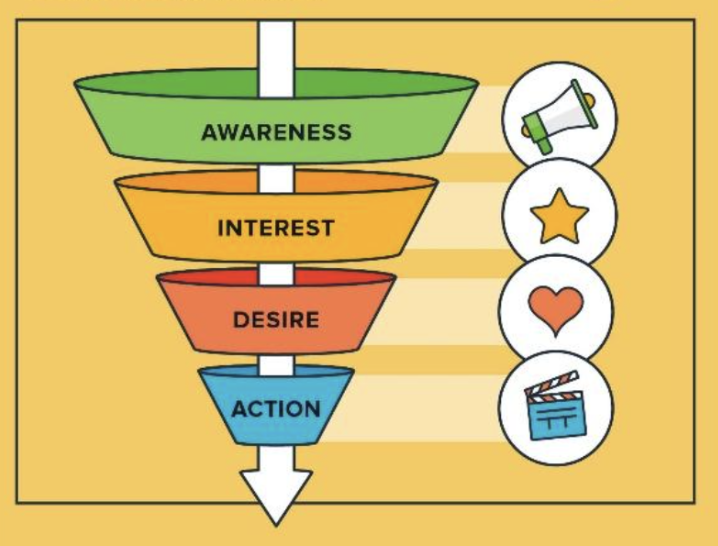

- Awareness (Kesadaran)

Tahap kesadaran adalah tahap di mana calon pelanggan mengeksplorasi, menemukan merek baru, dan mengidentifikasi kebutuhan mereka. Mereka belum tentu siap untuk membeli, tetapi sedang mengumpulkan informasi dan menyadari pilihan yang tersedia bagi mereka.

Tujuan bisnis pada tahap ini adalah untuk menarik calon pelanggan ini dan membuat mereka sadar akan merek atau produk mereka. Hal ini sering dicapai melalui strategi merek yang meningkatkan visibilitas dan menyediakan konten yang berharga, seperti postingan blog edukatif, konten media sosial yang menarik, atau webinar informatif.

 

- Interested (Minat)

Pelanggan pada tahap minat telah mengidentifikasi kebutuhan mereka dan kini secara aktif mencari serta mengevaluasi berbagai solusi. Mereka menyadari merek tersebut, tertarik untuk mempelajari lebih lanjut, dan bisnis berupaya menunjukkan bahwa penawaran mereka adalah solusi terbaik.

Untuk menarik calon pelanggan ini, bisnis akan memberikan informasi produk yang detail, testimoni pelanggan, dan mungkin mulai membangun daftar email pelanggan. Insentif seperti diskon dapat ditawarkan kepada pelanggan baru untuk mendorong pendaftaran.

 

- Desire (Keinginan)

Pada tahap keinginan, pelanggan memiliki pemahaman yang jelas tentang kebutuhan mereka dan mempertimbangkan merek sebagai solusi potensial. Kepercayaan menjadi faktor kunci, karena pelanggan perlu merasa yakin dengan merek dan penawarannya sebelum mereka bersedia melakukan pembelian.

Bisnis bertujuan untuk membantu calon pelanggan mempelajari lebih lanjut tentang merek dan produk mereka dengan menampilkan manfaat dan fitur unik produk atau layanan mereka, serta membangun kepercayaan melalui komunikasi yang transparan dan autentik.

Konten email yang ditargetkan juga dapat digunakan untuk menjaga calon pelanggan tetap terlibat dan mendorong mereka untuk kembali ke situs. Menawarkan insentif seperti penawaran eksklusif atau rekomendasi yang dipersonalisasi dapat membantu menumbuhkan keinginan pelanggan dan mendorong mereka lebih dekat untuk melakukan pembelian.

 

- Action (Tindakan)

Tahap tindakan adalah langkah terakhir dalam corong konversi; pelanggan telah melakukan riset, mengevaluasi pilihan mereka, dan siap untuk bertindak serta melakukan pembelian. Untuk memfasilitasi hal ini, bisnis memastikan proses pembelian yang lancar dan mudah.

Ini bisa berupa proses pembayaran yang mudah digunakan di situs e-commerce, beragam pilihan pembayaran, atau akses langsung ke produk digital. Setelah pembelian, memberikan layanan pelanggan yang prima dan komunikasi tindak lanjut dapat membantu memperkuat keputusan pelanggan dan meningkatkan pengalaman mereka secara keseluruhan.

### Menyiapkan Dataset, Mari Praktik
Untuk mulai melakukan analisis, aku akan:

- Menggabungkan dua dataset (Funnel & Product) 
- Mengambil beberapa kolom yang penting seperti date, product_id, product_name, product_category purchase, add_to_cart, click dan view

In [1]:
# membaca library
import pandas as pd

# membaca dataset
df_funnel = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')
df_product = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_product.csv')

# menggabungkan dua dataset
df_merged = pd.merge(df_funnel, df_product, on='product_id', how='left')

# pilih kolom yang ada saja (hindari KeyError)
kolom_dipakai = [col for col in [
    'date', 'product_id', 'product_name', 'product_category',
    'purchase', 'add_to_cart', 'click', 'view'
] if col in df_merged.columns]

df_merged = df_merged[kolom_dipakai]

# menampilkan dataset
print(df_merged.head())


      date    product_id  purchase  add_to_cart  click  view
0  1012024  DQProduk-001        87          979   3434  6631
1  1012024  DQProduk-002        70          671   2663  4956
2  1012024  DQProduk-003         9           90    353   535
3  1012024  DQProduk-004        17          200   1091  2093
4  1012024  DQProduk-005        25          224    844  1682


### Menghitung Jumlah Users Sesuai Tingkatan
Coba hitung total setiap proses user dari view, click, add to chart hingga purchase.

In [2]:
#membaca library
import pandas as pd

#membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')

#Hitung total users di setiap tahap funnel
total_funnel = df_merged[['view', 'click', 'add_to_cart', 'purchase']].sum()
print("Jumlah total users di setiap tingkatan funnel:")
print(total_funnel)

Jumlah total users di setiap tingkatan funnel:
view           76594780
click          60133577
add_to_cart    11149411
purchase        1115934
dtype: int64


## Conversion Rate
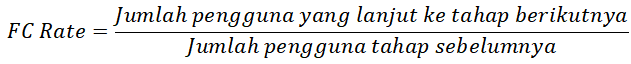

Misalnya, jika 1.000 pengguna mengunjungi toko online dan 50 di antaranya melakukan pembelian, rasio konversi corongnya adalah:

FC Rate = (50 / 1.000) x 100 = 5%

### Menghitung Conversation Rate
Menghitung Conversation Rate setiap proses user dari view, click, add to chart hingga purchase

In [3]:
#membaca library
import pandas as pd

#membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')

#Hitung total users di setiap tahap funnel
total_funnel = df_merged[['view', 'click', 'add_to_cart', 'purchase']].sum()

#Hitung rasio konversi antar tahap funnel
conversion_rate = (total_funnel / total_funnel.shift(1)) *100
conversion_rate = conversion_rate[1:]  #Hapus nilai NaN pertama

print("\nConversion Rate antar tahap:")
print(conversion_rate)


Conversion Rate antar tahap:
click          78.508714
add_to_cart    18.541074
purchase       10.008905
dtype: float64


## Analisis Penurunan (Drop)
Funnel membantu mengidentifikasi di mana pengguna mengalami masalah atau berhenti dalam alur Anda. Saat menganalisis corong, penting untuk menentukan tahap-tahap di mana pengguna berhenti. Ada dua cara utama untuk mengukurnya:

- Absolute Drop-off (Penurunan Mutlak)
Merupakan jumlah pengguna yang hilang atau tidak melanjutkan ke tahap berikutnya secara kuantitatif (angka mutlak). Ini menunjukkan di mana jumlah pengguna tertinggi keluar dari corong. Ini menyoroti langkah-langkah spesifik dengan kehilangan pengguna paling signifikan dalam angka mentah.

Ad = Jumlah di tahap sebelumnya-Jumlah di tahap sekarang

- Percentage Drop-off (Persentase Penurunan)
Ini mengukur persentase pengguna yang hilang di setiap langkah dibandingkan dengan langkah sebelumnya. Ini membantu mengidentifikasi tahapan yang memiliki dampak terbesar pada keseluruhan rasio konversi Anda.

Dengan memeriksa penurunan absolut dan relatif, Anda dapat lebih memahami perilaku pengguna, menemukan titik lemah dalam corong Anda, dan melakukan perbaikan berbasis data untuk meningkatkan konversi.

### Menghitung Absolute Drop-off Setiap Funnel
Menghitung Absolute Drop-off setiap proses user dari view, click, add to chart hingga purchase

In [4]:
#membaca library
import pandas as pd

#membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')

#Hitung total users di setiap tahap funnel
total_funnel = df_merged[['view', 'click', 'add_to_cart', 'purchase']].sum()

#Hitung jumlah drop-off absolut
dropoff = total_funnel.shift(1) - total_funnel
dropoff = dropoff [1:]

print("\nDrop-off antar tahap:")
print(dropoff)


Drop-off antar tahap:
click          16461203.0
add_to_cart    48984166.0
purchase       10033477.0
dtype: float64


### Menghitung Percentage Drop-off Setiap Funnel
Menghitung persentase Absolute Drop-off setiap proses user dari view, click, add to chart hingga purchase.

In [5]:
#membaca library
import pandas as pd

#membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')

#Hitung total users di setiap tahap funnel
total_funnel = df_merged[['view', 'click', 'add_to_cart', 'purchase']].sum()

# Hitung jumlah drop-off absolut (selisih dari tahap sebelumnya)
dropoff = total_funnel.shift(1) - total_funnel
dropoff = dropoff[1:]  # hilangkan NaN di tahap pertama

#Hitung persentase drop-off dibandingkan tahap sebelumnya
dropoff_percentage = dropoff / total_funnel.shift(1)[1:] * 100

print("\nPercentage Drop-off antar tahap:")
print(dropoff_percentage.round(2))




Percentage Drop-off antar tahap:
click          21.49
add_to_cart    81.46
purchase       89.99
dtype: float64


### Visualisasi Percentage Drop-off
Membuat visualisasi persentase Absolute Drop-off setiap proses user dari view, click, add to chart hingga purchase menggunakan diagram batang untuk visualisasi dengan warna biru langit. 

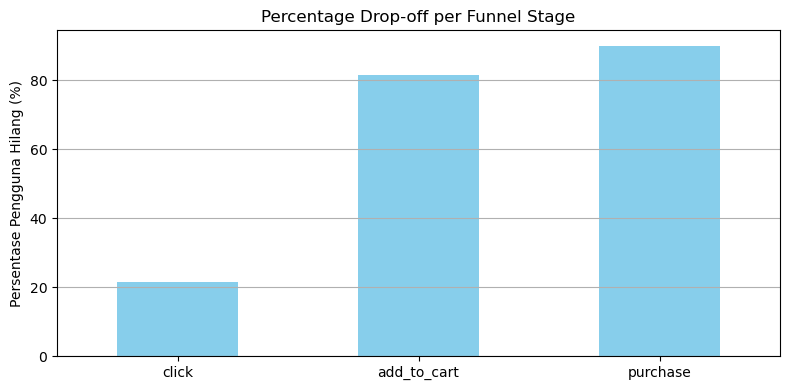

In [6]:
#membaca library
import pandas as pd
import matplotlib.pyplot as plt

#membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')

#Hitung total users di setiap tahap funnel
total_funnel = df_merged[['view', 'click', 'add_to_cart', 'purchase']].sum()

# Hitung drop-off absolut (selisih dari tahap sebelumnya)
dropoff = total_funnel.shift(1) - total_funnel
dropoff = dropoff[1:]  # hilangkan NaN di tahap pertama

#Hitung persentase drop-off dibandingkan tahap sebelumnya
dropoff_percentage = dropoff / total_funnel.shift(1)[1:] * 100

#Plot percentage drop-off
plt.figure(figsize = (8, 4))
dropoff_percentage.plot(kind = 'bar', color = 'skyblue')
plt.title('Percentage Drop-off per Funnel Stage')
plt.ylabel('Persentase Pengguna Hilang (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Menghitung Rasio Konversi Dari View Ke Purchase Untuk Setiap Kategori
Mencari nilai rasio konversi dari View ke Purchase untuk setiap kategori barang dan juga menampilkan jumlah view dan purchase setiap kategori.

In [7]:
#membaca library
import pandas as pd

#membaca dataset
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')

#Hitung jumlah pelanggan yang menonton iklan sampai membelinya
conversion_by_category = df_merged.groupby('product_category')[['view','purchase']].sum().reset_index()

#Hitung Conversion Rate setiap kategori
conversion_by_category['conversion_rate'] = round((conversion_by_category['purchase']/conversion_by_category['view']) * 100, 2)

#Urutkan dari yang tertinggi nilai conversion rate
conversion_by_category = conversion_by_category.sort_values(by = 'conversion_rate', ascending = False)

#Tampilkan hasil
print("\nConversion Rate per Product Category:")
print(conversion_by_category)




Conversion Rate per Product Category:
    product_category      view  purchase  conversion_rate
6         Pengemasan   3983229     60248             1.51
0         Alat Tulis  16857424    250239             1.48
3     Kertas & Cetak  12768256    187570             1.47
2         Elektronik  21565108    312722             1.45
4        Merchandise  15399684    223366             1.45
7  Perlengkapan Meja   2704624     37943             1.40
5         Organisasi   2874258     40017             1.39
1       Buku Catatan    442197      3829             0.87


Kategori Pengemasan paling efisien dalam mengonversi tayangan ke pembelian. Conversion rate-nya 1,51%. Meski tayangannya nggak banyak, tapi audiensnya kelihatan sangat tertarget. Sementara Alat Tulis, Elektronik, dan Kertas & Cetak menang di volume tayangan dan pembelian. Kalau conversion rate-nya ditingkatkan sedikit aja, potensinya besar banget. Buku Catatan cukup mengkhawatirkan. Conversion rate-nya paling rendah, cuma 0,87%, dan tayangannya juga minim. Kayaknya perlu dievaluasi dari sisi produk atau strategi pemasarannya.

### Identifikasi Kategori Produk dengan Drop-off Terbesar
Mencari kategori produk dengan Drop-off Terbesar dan menampilkan kategori produk dan jumlah drop off.

In [8]:
#Membaca library
import pandas as pd

#Load data
df_merged = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/funnel.csv')

#Hitung jumlah pelanggan yang menonton iklan sampai membelinya
df_merged = df_merged.groupby('product_category')[['view', 'click', 'add_to_cart', 'purchase']].sum().reset_index()

#Hitung absolute drop-off antar tahapan
df_merged['drop_view_click'] = df_merged['view'] - df_merged['click']
df_merged['drop_click_cart'] = df_merged['click'] - df_merged['add_to_cart']
df_merged['drop_cart_purchase'] = df_merged['add_to_cart'] - df_merged['purchase']

#Total drop-off
df_merged['total_dropoff'] = df_merged['drop_view_click'] + df_merged['drop_click_cart'] + df_merged['drop_cart_purchase']

#Tampilkan 10 produk dengan drop-off terbesar
top_dropoff = df_merged[['product_category','total_dropoff']].sort_values(by = 'total_dropoff', ascending=False).head()

print("\n10 Kategori Produk dengan Drop-off Terbesar:")
print(top_dropoff)


10 Kategori Produk dengan Drop-off Terbesar:
  product_category  total_dropoff
2       Elektronik       21252386
0       Alat Tulis       16607185
4      Merchandise       15176318
3   Kertas & Cetak       12580686
6       Pengemasan        3922981
